# Summary

3 种模型在 2 个数据集上的运行时间 & 正确率数据汇总如下：

| 模型 | MNIST 数据集 | CIFAR10 数据集 | 观点 |
| :--: | :--: | :--: | :-- |
| 单层 softmax | 6s, 92% | 15s, 35% | MNIST 可用，CIFAR10 不可用 |
| 3 层全连接模型 (无 dropout) | 9s, 97% | 30s, 39%~42%| 无本质变化，在 CIFAR10 数据集上依旧不可用 |
| 3 层全连接模型（有 dropout ） | 10s, 97% | 33s, 28%~34% | 模型更差。无 dropout 时的正确率有很大的过拟合嫌疑 |
| AlexNet | 8s, 97% | 3min, 70%| 在 CIFAR10 上可用了。关键进步！|

观点：

1. 单层 softmax 和 3 层全连接，在 CIFAR10 上性能飞掉，基本不具备实用价值。有没有 dropout，无本质变化。
2. AlexNet 在 CIFAR10 上展示了 CNN 网络的潜力。70% 的正确率，在容错率较高的场景下，具备一定的使用价值。

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time

tf.__version__

'2.1.0'

# 1. 单层 softmax 模型

测试在 MNIST & CIFAR10 数据集上到效果。作为后续测试的基准数据。

- MNIST 上 92%，可用
- CIFAR10 35%，模型飞掉，无实用价值

## 1.1 MNIST 数据集 - 1 Layer softmax

模型基本可用

- timecost: ~6s
- accuracy: 92%

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
N, W, H = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H)),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.4707 - accuracy: 0.8764
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3039 - accuracy: 0.9157
Epoch 3/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2832 - accuracy: 0.9201
Epoch 4/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2735 - accuracy: 0.9232
Epoch 5/5
10000/10000 [==============================] - 0s 16us/sample - loss: 0.2711 - accuracy: 0.9258
!! Total timecost: 5.95s


## 1.2 CIFAR10 数据集 -- 1 Layer softmax

模型飞掉，不能用。

相比于 MNIST 数据集，处理时间从 6s 到 15s，准确率从 92% 降到 37%。

- timecost: ~15s
- accuracy: 35%

In [5]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
N, W, H, C = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H, C)),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 31us/sample - loss: 1.9627 - accuracy: 0.3195
Epoch 2/10
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8730 - accuracy: 0.3546
Epoch 3/10
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8482 - accuracy: 0.3636
Epoch 4/10
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8418 - accuracy: 0.3698
Epoch 5/10
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8389 - accuracy: 0.3731
Epoch 6/10
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8326 - accuracy: 0.3745
Epoch 7/10
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8148 - accuracy: 0.3805
Epoch 8/10
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8136 - accuracy: 0.3825
Epoch 9/10
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8064 - accuracy

# 2. 3 层全连接模型 (无 dropout)

相对于单层 softmax，无本质变化，在 CIFAR10 数据集上依旧不可用。

在 MNIST 上有不错到正确率提升。

## 2.1 MNIST 数据集 -- 3 层全连接模型 (无 dropout)

模型效果提升明显，正确率从 92% 到 97%。

运行时间增加 50%，从 6s 到 9s，影响不大。

- timecost: ~9s
- accuracy: 97%

In [8]:
# 模型：3 层全连接，无 dropout
# 数据集：MNIST

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

N, W, H = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2374 - accuracy: 0.9275
Epoch 2/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1079 - accuracy: 0.9675
Epoch 3/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0761 - accuracy: 0.9759
Epoch 4/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0611 - accuracy: 0.9805
Epoch 5/5
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0983 - accuracy: 0.9720
!! Total timecost: 9.06s


## 2.2 CIFAR10 数据集 -- 3 层全连接模型 (无 dropout)

模型依旧不可用。

正确率从 37% 到 39%，变化不大。

- timecost: ~30s
- accuracy: 39% - 42%

In [9]:
# 模型：3 层全连接，无 dropout
# 数据集：CIFAR10

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

N, W, H, C = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H, C)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 59us/sample - loss: 1.8638 - accuracy: 0.3200
Epoch 2/10
50000/50000 [==============================] - 3s 59us/sample - loss: 1.7264 - accuracy: 0.3773
Epoch 3/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.6771 - accuracy: 0.3961
Epoch 4/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.6407 - accuracy: 0.4104
Epoch 5/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.6166 - accuracy: 0.4176
Epoch 6/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.5996 - accuracy: 0.4236
Epoch 7/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.5819 - accuracy: 0.4299
Epoch 8/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.5733 - accuracy: 0.4356
Epoch 9/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.5575 - accuracy

# 3. 3 层全连接模型 (有 dropout )

相对于没有 dropout，无本质变化，在 CIFAR10 数据集上依旧不可用。

## 3.1 MNIST 数据集 -- 3 层全连接模型 (有 dropout )

各项指标基本不变。如果 epoch=20，正确可以达到 98%，很微小的提升。

- timecost: ~10s
- accuracy: 97%

In [10]:
# 模型：3 层全连接，有 dropout
# 数据集：MNIST

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

N, W, H = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H)),
#     tf.keras.layers.Flatten(input_shape=(W, H)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3098 - accuracy: 0.9050
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1715 - accuracy: 0.9469
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1411 - accuracy: 0.9561
Epoch 4/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1244 - accuracy: 0.9608
Epoch 5/5
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0871 - accuracy: 0.9734
!! Total timecost: 10.37s


## 3.2 CIFAR10 数据集 -- 3 层全连接模型 (有 dropout )

模型依旧不可用，更差。说明，没有 dropout 时的正确率有很大的过拟合嫌疑。

正确率在 28% - 34% 之间波动。

- timecost: ~33s
- accuracy: 28% - 34%

In [11]:
# 模型：3 层全连接，有 dropout
# 数据集：CIFAR10

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

N, W, H, C = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H, C)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 66us/sample - loss: 2.0519 - accuracy: 0.2213
Epoch 2/10
50000/50000 [==============================] - 3s 62us/sample - loss: 1.9945 - accuracy: 0.2453
Epoch 3/10
50000/50000 [==============================] - 3s 62us/sample - loss: 1.9769 - accuracy: 0.2560
Epoch 4/10
50000/50000 [==============================] - 3s 62us/sample - loss: 1.9612 - accuracy: 0.2644
Epoch 5/10
50000/50000 [==============================] - 3s 62us/sample - loss: 1.9525 - accuracy: 0.2649
Epoch 6/10
50000/50000 [==============================] - 3s 62us/sample - loss: 1.9475 - accuracy: 0.2732
Epoch 7/10
50000/50000 [==============================] - 3s 62us/sample - loss: 1.9435 - accuracy: 0.2697
Epoch 8/10
50000/50000 [==============================] - 3s 62us/sample - loss: 1.9405 - accuracy: 0.2756
Epoch 9/10
50000/50000 [==============================] - 3s 62us/sample - loss: 1.9371 - accuracy

# 4. AlexNet -- 简单又经典的入门级 CNN 模型

在 CIFAR10 上展示了 CNN 网络的潜力。70% 的正确率，在容错率较高的场景下，具备一定的使用价值。

在 MNIST 上，无明显变化。

## 4.1 MNIST 数据集合 -- AlexNet

正确率和时间，与 3 层 softmax 模型差不多。

- timecost: ~8s
- accuracy: 97%

In [12]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

N, W, H = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))
model.evaluate(x_test, y_test, verbose=2)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3890 - accuracy: 0.8852 - val_loss: 0.1612 - val_accuracy: 0.9515
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2192 - accuracy: 0.9351 - val_loss: 0.1247 - val_accuracy: 0.9628
Epoch 3/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1803 - accuracy: 0.9463 - val_loss: 0.1027 - val_accuracy: 0.9691
Epoch 4/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1612 - accuracy: 0.9517 - val_loss: 0.0947 - val_accuracy: 0.9714
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1475 - accuracy: 0.9550 - val_loss: 0.0917 - val_accuracy: 0.9727
10000/10000 - 0s - loss: 0.0917 - accuracy: 0.9727
!! Total timecost: 8.20s


## 4.2 CIFAR10 数据集合

相比于 3 个全连接层，AlexNet 的准确率从 37% 提高到 70%，接近一倍。处理时间从 30s 到 3min，增加 6 倍。

模型的性能，明显提升。达到了有一定使用价值的水平。

- timecost: ~189s (3min)
- accuracy: 70%

In [13]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

N, W, H, C = x_train.shape
N_LABELS = 10

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(W, H, C)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(N_LABELS, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print('!! start time counting')
tic = time.time()

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))
model.evaluate(x_test, y_test, verbose=2)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 377us/sample - loss: 1.5209 - accuracy: 0.4448 - val_loss: 1.2807 - val_accuracy: 0.5485
Epoch 2/10
50000/50000 [==============================] - 19s 372us/sample - loss: 1.1419 - accuracy: 0.5949 - val_loss: 1.0891 - val_accuracy: 0.6199
Epoch 3/10
50000/50000 [==============================] - 19s 375us/sample - loss: 0.9917 - accuracy: 0.6517 - val_loss: 0.9828 - val_accuracy: 0.6540
Epoch 4/10
50000/50000 [==============================] - 19s 373us/sample - loss: 0.9071 - accuracy: 0.6820 - val_loss: 0.9437 - val_accuracy: 0.6727
Epoch 5/10
50000/50000 [==============================] - 19s 373us/sample - loss: 0.8294 - accuracy: 0.7087 - val_loss: 0.8797 - val_accuracy: 0.6932
Epoch 6/10
50000/50000 [==============================] - 19s 373us/sample - loss: 0.7726 - accuracy: 0.7291 - val_loss: 0.9133 - val_accuracy: 0.6820
Epoch 7/10
50000/5000

10000/10000 - 1s - loss: 0.9046 - accuracy: 0.6962
0.6962


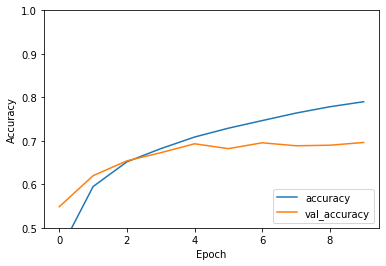

In [14]:
# train vs evaluate 的 accuracy 曲线
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)